In [43]:
import torch
import numpy
import matplotlib.pyplot as plt
from torch.nn import Parameter
from torch import nn
from IPython import display
%matplotlib inline

In [44]:
class Network(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        self.W = Parameter(torch.normal(0, 0.01, size = (1, 1)))
        self.b = Parameter(torch.zeros(1))
    
    def forward(self, inputs):
        return torch.matmul(inputs, self.W) + self.b

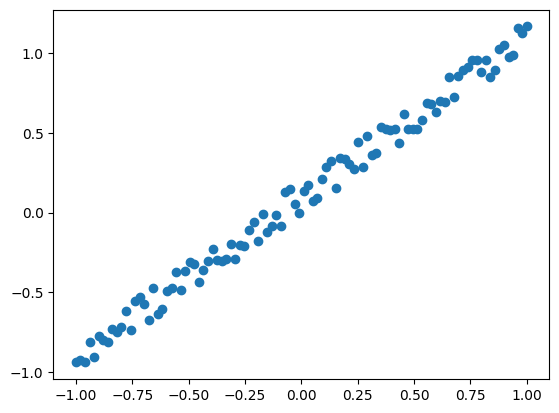

In [45]:
# 准备数据

trainX = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
trainY = trainX + 0.2 * torch.rand(trainX.size())                # random noisy

plt.scatter(trainX.data.numpy(), trainY.data.numpy())

In [46]:
model = Network()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.03)

def LossFunction(predictionY, Y):
    return (predictionY - Y).pow(2).mean()

In [47]:
history = {
    'loss': []
}

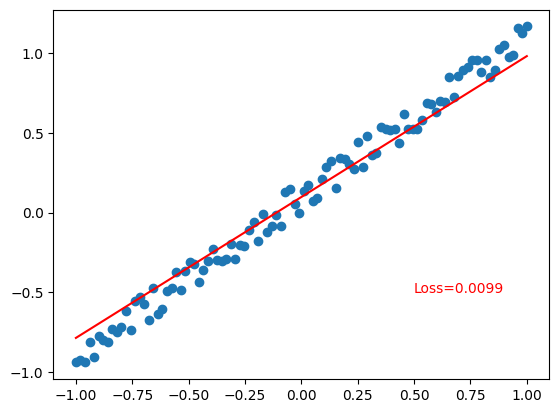

In [48]:
for i in range(100):
    predictionY = model(trainX)
    loss = LossFunction(predictionY, trainY)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 5 == 0:
        plt.cla()
        plt.scatter(trainX.data.numpy(), trainY.data.numpy())
        plt.plot(trainX.data.numpy(), predictionY.data.numpy(), 'r-')
        plt.text(0.5, -0.5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

        display.clear_output(wait = True)
        history['loss'].append(loss.item())